In [2]:
# Import the libraries
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

In [6]:
# download the stock data
start = '2020-01-01'
end = '2024-01-01'

stock = yf.download('TSLA', start, end)
stock.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500


In [7]:
# Create the function to get the williams percent %R values
def get_wr(high, low, close, lookback_period):
    highh = high.rolling(lookback_period).max()
    lowl = low.rolling(lookback_period).min()
    wr = -100 * ((highh - close) / (highh - low))
    return wr

In [8]:
# Calculate the williams percent R with a lookback period of 14 days and store it into a variable
stock['wr_14'] = get_wr(stock['High'], stock['Low'], stock['Close'], 14)

In [9]:
# Generate buy/sell signals
buy_signals = stock[stock['wr_14'] <= -80]['Close']
sell_signals = stock[stock['wr_14'] >= -20]['Close']

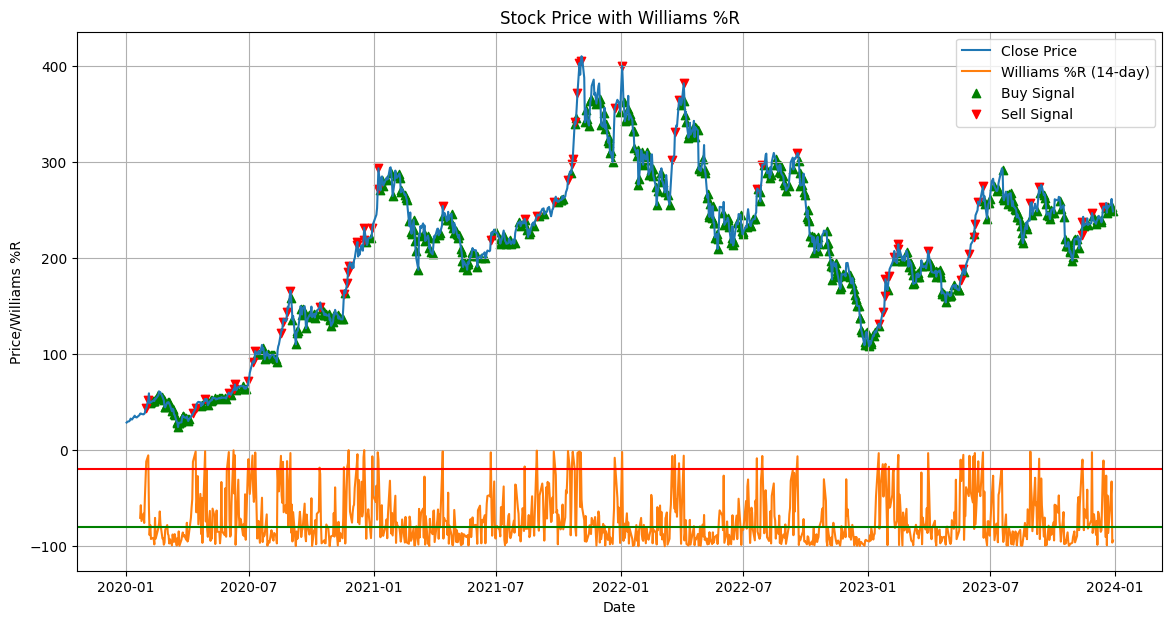

In [10]:
# Plot the data and the Williams %R
plt.figure(figsize= (14, 7))
plt.plot(stock['Close'], label= 'Close Price')
plt.plot(stock['wr_14'], label='Williams %R (14-day)')
plt.scatter(buy_signals.index, buy_signals, label= 'Buy Signal', marker='^', color='green')
plt.scatter(sell_signals.index, sell_signals, label= 'Sell Signal', marker='v', color='red')
plt.axhline(y=-80, color='g', linestyle='-') # over sold we want to buy
plt.axhline(y=-20, color='r', linestyle='-') # Its over bought we want to sell
plt.xlabel('Date')
plt.ylabel('Price/Williams %R')
plt.title('Stock Price with Williams %R')
plt.legend()
plt.grid(True)
plt.show()